In [11]:
import pandas as pd
import numpy as np

In [2]:
try:
    new = pd.read_csv(r'C:\Users\Akhil Sanker\Downloads\Compressed\BindingDB_All.tsv',sep='\t',chunksize=50,usecols=['PubChem CID','Target Name Assigned by Curator or DataSource','Ki (nM)','IC50 (nM)','Kd (nM)'])
except Exception as e:
    print(e)

In [3]:
var=1
for i in range(10):
    if i==0:
        var=1
    else:
        pass
    try:

        for df in new:
            df.to_csv('file.csv', sep=',', mode='a')
    except:
        print("Error : "+str(var))
        var+=1
        pass

In [4]:
for i in range(10):
    try:
        file1 =  pd.read_csv("file.csv")
    except Exception as e:
        print(e)

In [5]:
temp_work_file_new = file1[['PubChem CID','Target Name Assigned by Curator or DataSource','Ki (nM)','IC50 (nM)','Kd (nM)']]

In [6]:
temp_work_file_new.to_csv("temp_work_file_new.csv")

In [24]:
tmp_wrk = temp_work_file_new.loc[temp_work_file_new['PubChem CID']!='PubChem CID']

In [25]:
tmp_wrk

,PubChem CID,Target Name Assigned by Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM)
0,3081361,HIV-1 Protease,0.24,NaN,NaN
1,5327236,HIV-1 Protease,0.25,NaN,NaN
2,5327235,HIV-1 Protease,0.41,NaN,NaN
3,5327234,HIV-1 Protease,0.8,NaN,NaN
4,3009319,HIV-1 Protease,0.99,NaN,NaN
...,...,...,...,...,...
1849817,76332799,"Presequence protease, mitochondrial",NaN,NaN,NaN
1849818,76336420,"Presequence protease, mitochondrial",NaN,NaN,NaN
1849819,76332799,"Presequence protease, mitochondrial",NaN,NaN,NaN
1849821,76336420,"Presequence protease, mitochondrial",NaN,NaN,NaN


# Temp Work - Network analysis


In [48]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

**Creation**

In [45]:
g = nx.Graph()

In [46]:
g.add_node('A')
g.add_node('B')
g.add_nodes_from(['C','D','E'])
g.add_edge('A','B')
g.add_edge('B','C')
g.add_edge('C','D')
g.add_edge('D','E')
g.add_edge('E','A')
g.add_edges_from([('D','A'),('C','A'),('D','B'),('C','E')])

In [47]:
g.nodes(),g.edges(),nx.info(g)

(NodeView(('A', 'B', 'C', 'D', 'E')),
 EdgeView([('A', 'B'), ('A', 'E'), ('A', 'D'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]),
 'Name: \nType: Graph\nNumber of nodes: 5\nNumber of edges: 9\nAverage degree:   3.6000')

**Plotting**

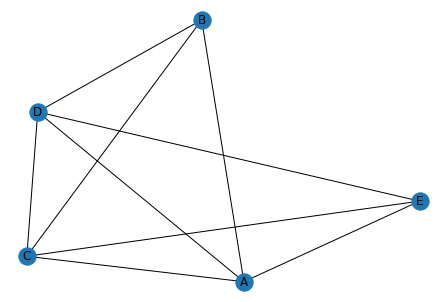

In [50]:
nx.draw(g,with_labels=True)

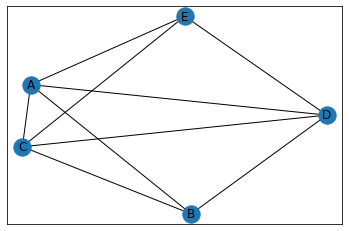

In [51]:
nx.draw_networkx(g)

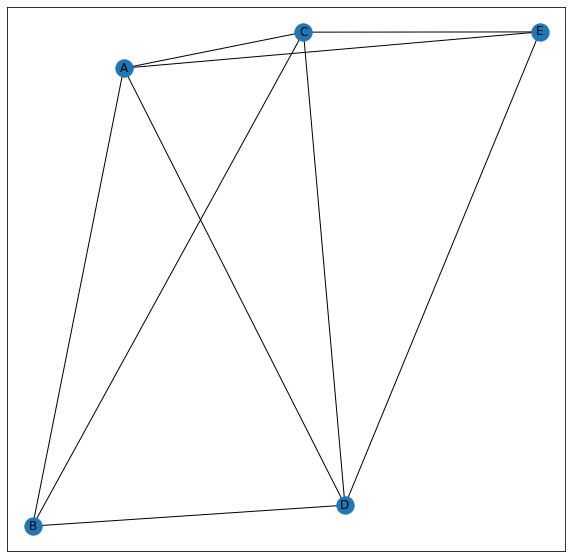

In [53]:
plt.figure(figsize=(10,10))
nx.draw_networkx(g)
plt.show()

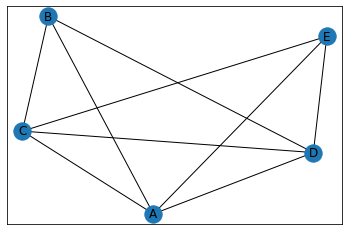

In [55]:
nx.spring_layout(g)
nx.draw_networkx(g)

**Analysis**

In [61]:
nx.degree(g,'A'),nx.degree(g,'C'),nx.degree(g,'E') #Nodes connected to

(4, 4, 3)

In [66]:
nx.shortest_path(g,'A','E'), nx.shortest_path(g,'A','C') #shortest distance

(['A', 'E'], ['A', 'C'])

In [67]:
nx.degree_centrality(g)

{'A': 1.0, 'B': 0.75, 'C': 1.0, 'D': 1.0, 'E': 0.75}

In [68]:
nx.eigenvector_centrality(g)

{'A': 0.47922935468618827,
 'B': 0.3943460896352204,
 'C': 0.47922935468618827,
 'D': 0.47922935468618827,
 'E': 0.3943460896352204}

In [69]:
nx.betweenness_centrality(g)

{'A': 0.05555555555555555,
 'B': 0.0,
 'C': 0.05555555555555555,
 'D': 0.05555555555555555,
 'E': 0.0}

In [70]:
nx.average_clustering(g)

0.9

**TARGET - WORK**

1. ) nodes  - target_name , cid 
interrelation - ki,kd,ic50 ( less > closer the nodes)

  2.) user gives a cid , we form a network of related compounds 
  
  We do it , by a) download the structure-similar compounds
  b) We'll compare with the network (closely linked checking - )